# Build Model

## Import the base libraries required for this modeling

In [ ]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve, confusion_matrix, auc
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
!conda install -c conda-forge py-xgboost

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

done
Solving environment: / 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

| 

/ 

- 

\ 

done



# All requested packages already installed.



In [ ]:
#!pip uninstall scikit-learn -y
#!pip install scikit-learn

In [ ]:
!pip install imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.1/199.1 KB 15.9 MB/s eta 0:00:00


In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import xgboost as xgb

## Load & Split data

In [ ]:
txns = pd.read_csv('./train.csv')
txns.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [ ]:
# Split the data into training and test set with a ration of 0.7:0.3 and constant random
X_train, X_test, y_train, y_test = train_test_split(txns.drop(columns=['ID_code','target']), txns['target'], test_size=0.3, random_state=11, stratify=txns['target'])

# Fit Model

In [ ]:
import xgboost as xgb

# XGBoost
params = {
          'learning_rate': [0.1, 0.01],
          'colsample_bytree': [0.6, 0.8, 1.0],
          'subsample': [0.6, 0.8, 1.0],
          'max_depth':[2, 3, 4],
          'n_estimators': [100, 200, 300, 400],
          'reg_lambda': [1, 1.5, 2],
          'gamma': [0, 0.1, 0.3]            
         }

gbm = xgb.XGBClassifier(objective='binary:logistic', 
                        tree_method='gpu_hist', 
                        eval_metric='auc', 
                        seed=11, 
                        use_label_encoder=False)

# GridSearchCV
rs_cv = RandomizedSearchCV(estimator=gbm, 
                            param_distributions=params, 
                            cv=10,
                            scoring='roc_auc',
                            n_jobs=-1,
                            n_iter=50)

# Fit the pipeline
%time rs_cv.fit(X_train, y_train)

CPU times: user 9.23 s, sys: 3.41 s, total: 12.6 s
Wall time: 16min 40s


RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False,
                                           eval_metric='auc', gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           m...
                                           scale_pos_weight=None, seed=11,
                                           subsample=None,
   

In [ ]:
rs_cv.best_params_

{'subsample': 0.6,
 'reg_lambda': 1.5,
 'n_estimators': 400,
 'max_depth': 4,
 'learning_rate': 0.1,
 'gamma': 0,
 'colsample_bytree': 0.6}

In [ ]:
# Gradient Boosted DecisionTree
model = rs_cv.best_estimator_

# Evaluate the Model

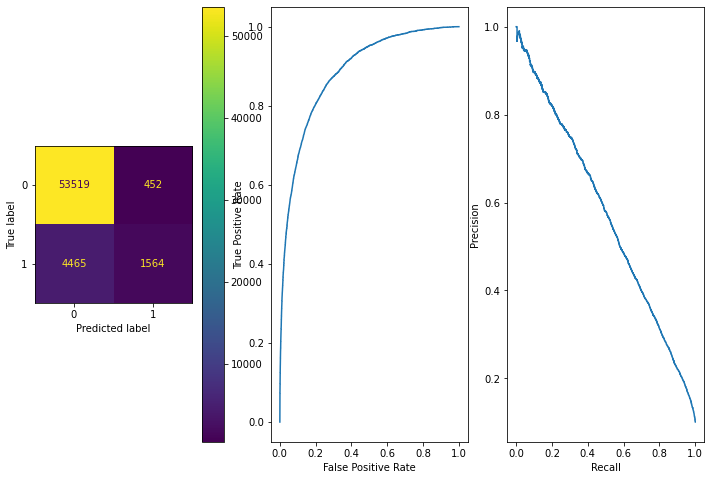

In [ ]:
y_pred = model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm)

# ROC Curve
y_score = model.predict_proba(X_test)[:,1]

fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=model.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)

# Precision-Recall Curve
prec, recall, _ = precision_recall_curve(y_test, y_score, pos_label=model.classes_[1])
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 8))

cm_display.plot(ax=ax1)
roc_display.plot(ax=ax2)
pr_display.plot(ax=ax3)
plt.show()

In [ ]:
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred, pos_label=model.classes_[1]))
print("Recall: ", recall_score(y_test, y_pred, pos_label=model.classes_[1]))
print("F1-Score: ", f1_score(y_test, y_pred, pos_label=model.classes_[1]))

Accuracy:  0.91805
Precision:  0.7757936507936508
Recall:  0.25941283794990877
F1-Score:  0.3888129272840274


- Accuracy:  0.91805
- Precision:  0.7757936507936508
- Recall:  0.25941283794990877
- F1-Score:  0.3888129272840274

### The Recall is low as the dataset is highly imbalanced and does not have enough positive use cases to learn from. In addition, we also observe that the accuracy and precision are high for the same reason given the data is skewed 9:1 in favor of target 0. 

### We will not apply the SMOTE technique here to oversample the minority data similar to the LogisticRegression model from earlier.

# SMOTE - Minority Oversampling

[]

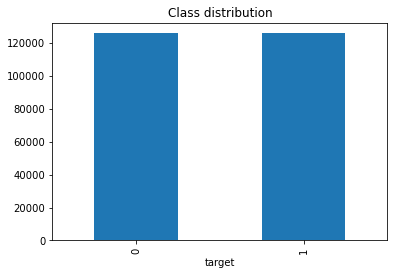

In [ ]:
over = SMOTE(sampling_strategy=0.7, random_state=11, k_neighbors=7)
under = RandomUnderSampler(sampling_strategy=1, random_state=11)

steps = [('o', over), ('u', under)]
#steps = [('o', over)]
pipeline = Pipeline(steps=steps)

# transform the dataset
X_smote, y_smote = pipeline.fit_resample(txns.drop(columns=['ID_code','target']), txns['target'])

# Check the class distribution
pd.concat([X_smote, y_smote], axis=1).pivot_table(index='target', aggfunc='size').plot(kind='bar', title = 'Class distribution').plot()

In [ ]:
# Split the data into training and test set with a ration of 0.7:0.3 and constant random
X_smote_train, X_smote_test, y_smote_train, y_smote_test = train_test_split(X_smote, y_smote, test_size=0.3, random_state=11)

In [ ]:
# XGBoost
params_smote = {
          'learning_rate': [0.1, 0.01],
          'colsample_bytree': [0.6, 0.8, 1.0],
          'subsample': [0.6, 0.8, 1.0],
          'max_depth':[2, 3, 4],
          'n_estimators': [100, 200, 300, 400],
          'reg_lambda': [1, 1.5, 2],
          'gamma': [0, 0.1, 0.3]            
         }

gbm_smote = xgb.XGBClassifier(objective='binary:logistic', 
                        tree_method='gpu_hist', 
                        eval_metric='auc', 
                        seed=11, 
                        use_label_encoder=False)

# GridSearchCV
rs_cv_smote = RandomizedSearchCV(estimator=gbm_smote, 
                            param_distributions=params_smote, 
                            cv=10,
                            scoring='roc_auc',
                            n_jobs=-1,
                            n_iter=50)

# Fit the pipeline
%time rs_cv_smote.fit(X_smote_train, y_smote_train)

CPU times: user 8.98 s, sys: 3.03 s, total: 12 s
Wall time: 20min 3s


RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False,
                                           eval_metric='auc', gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           m...
                                           scale_pos_weight=None, seed=11,
                                           subsample=None,
   

In [ ]:
rs_cv_smote.best_params_

{'subsample': 1.0,
 'reg_lambda': 1,
 'n_estimators': 400,
 'max_depth': 4,
 'learning_rate': 0.1,
 'gamma': 0,
 'colsample_bytree': 0.8}

In [ ]:
# Gradient Boosted DecisionTree
model_smote = rs_cv_smote.best_estimator_

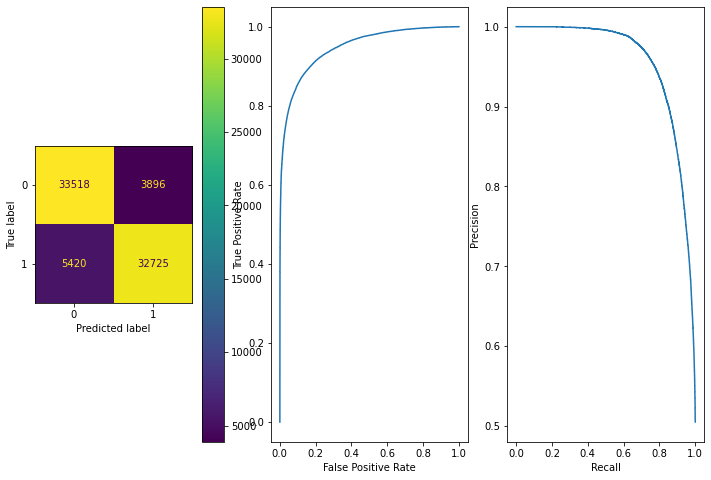

In [ ]:
y_smote_pred = model_smote.predict(X_smote_test)

# Confusion Matrix
cm_smote = confusion_matrix(y_smote_test, y_smote_pred)
cm_smote_display = ConfusionMatrixDisplay(cm_smote)

# ROC Curve
y_smote_score = model_smote.predict_proba(X_smote_test)[:,1]

fpr_smote, tpr_smote, _ = roc_curve(y_smote_test, y_smote_score, pos_label=model_smote.classes_[1])
roc_smote_display = RocCurveDisplay(fpr=fpr_smote, tpr=tpr_smote)

# Precision-Recall Curve
prec_smote, recall_smote, _ = precision_recall_curve(y_smote_test, y_smote_score, pos_label=model_smote.classes_[1])
pr_smote_display = PrecisionRecallDisplay(precision=prec_smote, recall=recall_smote)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 8))

cm_smote_display.plot(ax=ax1)
roc_smote_display.plot(ax=ax2)
pr_smote_display.plot(ax=ax3)
plt.show()

In [ ]:
print("Accuracy: ", accuracy_score(y_smote_test, y_smote_pred))
print("Precision: ", precision_score(y_smote_test, y_smote_pred, pos_label=model_smote.classes_[1]))
print("Recall: ", recall_score(y_smote_test, y_smote_pred, pos_label=model_smote.classes_[1]))
print("F1-Score: ", f1_score(y_smote_test, y_smote_pred, pos_label=model_smote.classes_[1]))

Accuracy:  0.8767056207731706
Precision:  0.8936129543158298
Recall:  0.8579106042731681
F1-Score:  0.8753979081400637


- Accuracy:  0.8767056207731706
- Precision:  0.8936129543158298
- Recall:  0.8579106042731681
- F1-Score:  0.8753979081400637

## Feature Importance Plot

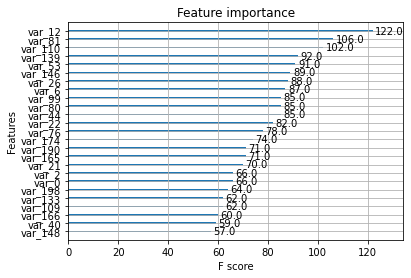

In [ ]:
from xgboost import plot_importance

# plot feature importance
plot_importance(model_smote, max_num_features=25)
plt.show()

# SMOTE with PCA (Principal Component Analysis)

### We have 200 features to train the model. Given that all the 200 features are numeric, it makes sense to scale the features and apply PCA to reduce the feature dimensionality. We will still be able to capture variance in the data while building a better model that trains faster as well.

## Scale Data

In [ ]:
from sklearn.preprocessing import StandardScaler

# Split the data into training and test set with a ration of 0.7:0.3 and constant random
X_smote_train, X_smote_test, y_smote_train, y_smote_test = train_test_split(X_smote, y_smote, test_size=0.3, random_state=11)

scaler_train = StandardScaler().fit(X_smote_train)

X_smote_train = scaler_train.transform(X_smote_train)
X_smote_test = scaler_train.transform(X_smote_test)

## Reduce Dimensionality

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(0.95)

pca.fit(X_smote)

X_smote_train = pca.transform(X_smote_train)
X_smote_test = pca.transform(X_smote_test)

## Re-run Model

In [ ]:
# XGBoost
params_smote = {
          'learning_rate': [0.1, 0.01],
          'colsample_bytree': [0.6, 0.8, 1.0],
          'subsample': [0.6, 0.8, 1.0],
          'max_depth':[2, 3, 4],
          'n_estimators': [100, 200, 300, 400],
          'reg_lambda': [1, 1.5, 2],
          'gamma': [0, 0.1, 0.3]            
         }

gbm_smote = xgb.XGBClassifier(objective='binary:logistic', 
                        tree_method='gpu_hist', 
                        eval_metric='auc', 
                        seed=11, 
                        use_label_encoder=False)

# GridSearchCV
rs_cv_smote = RandomizedSearchCV(estimator=gbm_smote, 
                            param_distributions=params_smote, 
                            cv=10,
                            scoring='roc_auc',
                            n_jobs=-1,
                            n_iter=50)

# Fit the pipeline
%time rs_cv_smote.fit(X_smote_train, y_smote_train)

CPU times: user 6.24 s, sys: 2.39 s, total: 8.62 s
Wall time: 12min 2s


RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False,
                                           eval_metric='auc', gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           m...
                                           scale_pos_weight=None, seed=11,
                                           subsample=None,
   

In [ ]:
rs_cv_smote.best_params_

{'subsample': 0.8,
 'reg_lambda': 1.5,
 'n_estimators': 400,
 'max_depth': 4,
 'learning_rate': 0.1,
 'gamma': 0.3,
 'colsample_bytree': 1.0}

In [ ]:
# Gradient Boosted DecisionTree
model_smote = rs_cv_smote.best_estimator_

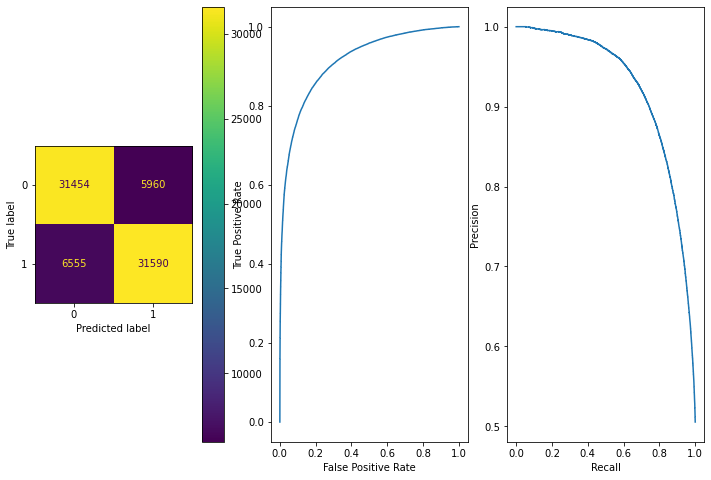

In [ ]:
y_smote_pred = model_smote.predict(X_smote_test)

# Confusion Matrix
cm_smote = confusion_matrix(y_smote_test, y_smote_pred)
cm_smote_display = ConfusionMatrixDisplay(cm_smote)

# ROC Curve
y_smote_score = model_smote.predict_proba(X_smote_test)[:,1]

fpr_smote, tpr_smote, _ = roc_curve(y_smote_test, y_smote_score, pos_label=model_smote.classes_[1])
roc_smote_display = RocCurveDisplay(fpr=fpr_smote, tpr=tpr_smote)

# Precision-Recall Curve
prec_smote, recall_smote, _ = precision_recall_curve(y_smote_test, y_smote_score, pos_label=model_smote.classes_[1])
pr_smote_display = PrecisionRecallDisplay(precision=prec_smote, recall=recall_smote)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 8))

cm_smote_display.plot(ax=ax1)
roc_smote_display.plot(ax=ax2)
pr_smote_display.plot(ax=ax3)
plt.show()

In [ ]:
print("Accuracy: ", accuracy_score(y_smote_test, y_smote_pred))
print("Precision: ", precision_score(y_smote_test, y_smote_pred, pos_label=model_smote.classes_[1]))
print("Recall: ", recall_score(y_smote_test, y_smote_pred, pos_label=model_smote.classes_[1]))
print("F1-Score: ", f1_score(y_smote_test, y_smote_pred, pos_label=model_smote.classes_[1]))

Accuracy:  0.8343678449953017
Precision:  0.8412782956058589
Recall:  0.8281557215886748
F1-Score:  0.8346654336481933


- Accuracy:  0.8343678449953017
- Precision:  0.8412782956058589
- Recall:  0.8281557215886748
- F1-Score:  0.8346654336481933

# Final Observation

### We obtained the best performing model when leveraging SMOTE to oversample minority dataset.

- Accuracy: 0.8767056207731706
- Precision: 0.8936129543158298
- Recall: 0.8579106042731681
- F1-Score: 0.8753979081400637

#### Hyperparameters for this model:

```
{'subsample': 1.0,
 'reg_lambda': 1,
 'n_estimators': 400,
 'max_depth': 4,
 'learning_rate': 0.1,
 'gamma': 0,
 'colsample_bytree': 0.8}
```
